In [120]:
# @title IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error
plt.figure(figsize=(10,5))
%matplotlib inline
import plotly.express as px

<Figure size 1000x500 with 0 Axes>

In [104]:
# @title LOADING DATASET
df=pd.read_csv('/content/Advertising.csv')

In [105]:
# @title EDA
# checking dataset
df


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [106]:
#checking no of rows and columns
df.shape  # we have 200 rows and 5 columns

(200, 5)

In [107]:
#checking data types and null values in dataset
df.info()   # we got all numerical data column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [108]:
#checking for duplicate entries
df.duplicated().sum()  # 0 duplicate values

0

In [109]:
# checking basic statistics.
df.describe()  # we can observe large gap between 75% and maximum of newspaper column which leads to presence of outliers, which may create biases in our analysis.

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Text(0.5, 1.0, 'Boxplot of newspaper')

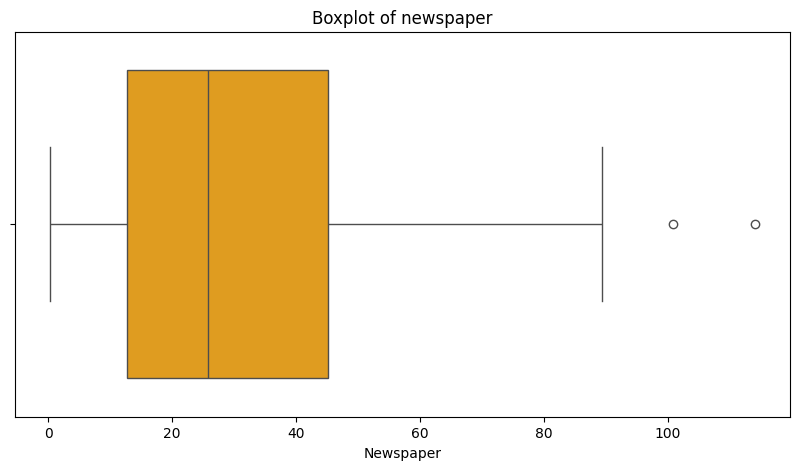

In [110]:
# @title DATA VISUALIZATION
# checking outliers in newspaper column using boxplot
plt.figure(figsize=(10,5))
sns.boxplot(df['Newspaper'],orient='h',color='orange')
plt.title('Boxplot of newspaper')
# we can see the outliers are present in newspaper.

Text(0.5, 1.0, 'Box plot of TV')

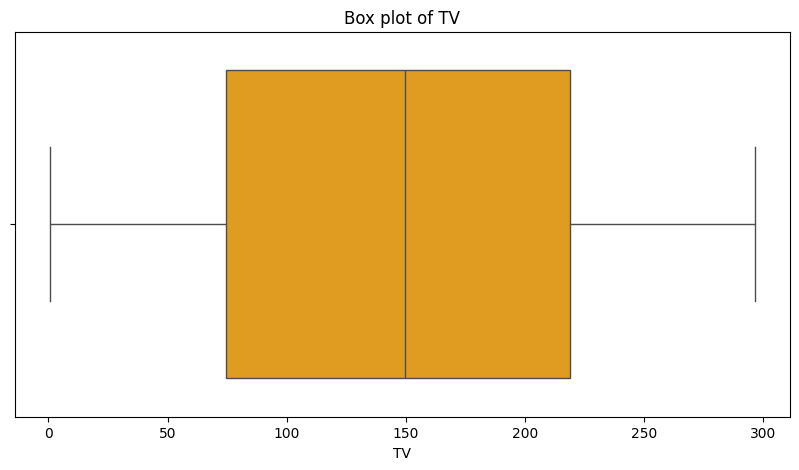

In [111]:
plt.figure(figsize=(10,5))
sns.boxplot(df['TV'],orient='h',color='orange')
plt.title('Box plot of TV')  # no outliers are present

Text(0.5, 1.0, 'Box plot of Radio')

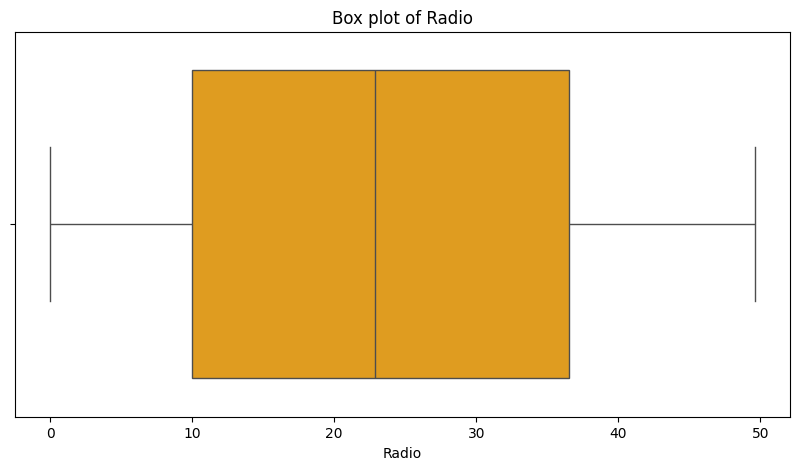

In [112]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Radio'],orient='h',color='orange')
plt.title('Box plot of Radio') #no outliers are present in radio.

<Figure size 500x500 with 0 Axes>

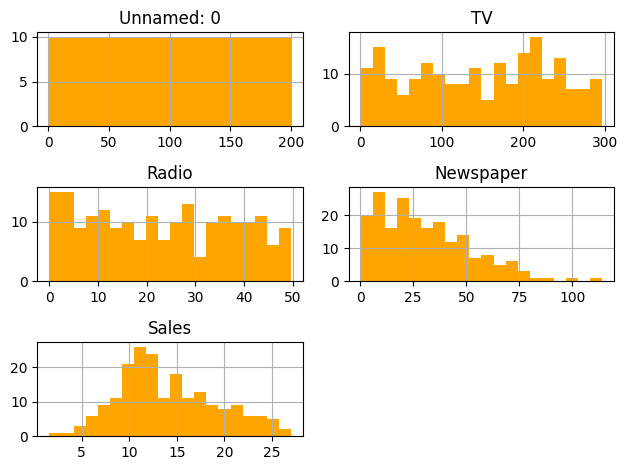

In [113]:
plt.figure(figsize=(5,5))
df.hist(bins=20,color='orange')
plt.tight_layout()

In [114]:
# dropping unamed column as it is unnecessary
df=df.drop('Unnamed: 0',axis=1)

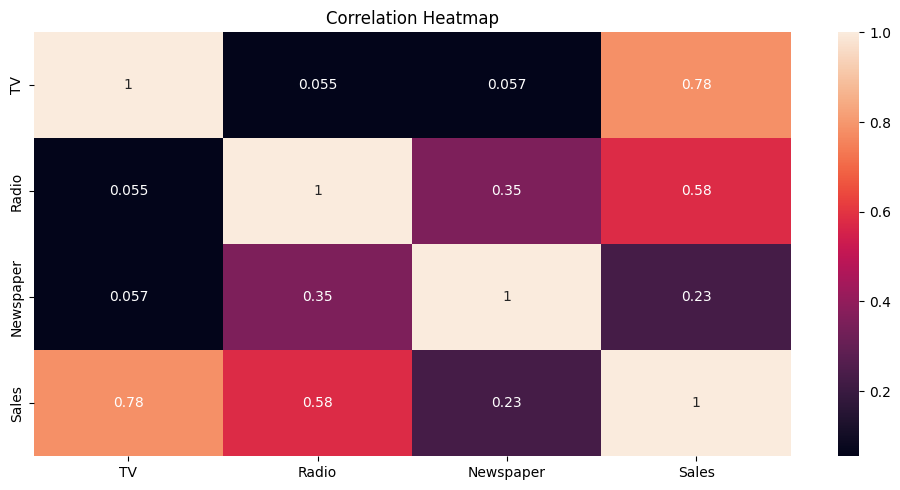

In [115]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.tight_layout()

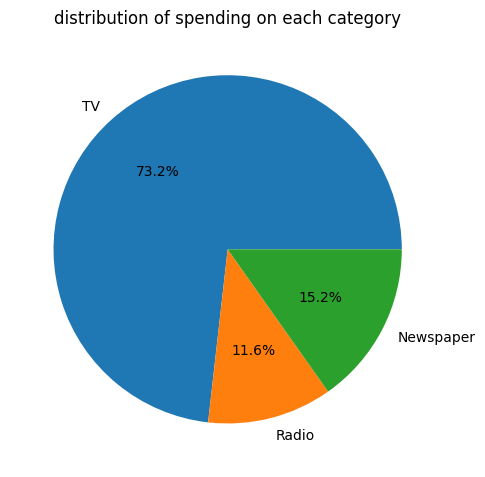

In [116]:
sizes=df[['TV','Radio','Newspaper']].sum()
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=['TV','Radio','Newspaper'], autopct='%1.1f%%')
plt.title('distribution of spending on each category')
plt.tight_layout()

In [118]:
# @title SPLITTING DATA
X=(df.drop(columns=['Sales'])).values
Y=df[['Sales']].values.flatten()

In [119]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=42)   #giving test size 25% and training data 75%


In [121]:
#scaling our data using standard scaler
scaler=StandardScaler()
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.fit_transform(x_test)

In [123]:
# @title MODEL BUILDING AND EVALUATION
rfr_model=RandomForestRegressor(random_state=42)
rfr_model.fit(x_train_scale, y_train)

y_train_pred=rfr_model.predict(x_train_scale)
y_test_pred=rfr_model.predict(x_test_scale)

mse_train=mean_squared_error(y_train, y_train_pred)
mse_test=mean_squared_error(y_test, y_test_pred)
r2_train=r2_score(y_train, y_train_pred)
r2_test=r2_score(y_test, y_test_pred)

print('Random Forest Regressor Evaluation =>\n\tTrain:\n\t\tMSE: {}\n\t\tR2 Score: {}\n\tTest:\n\t\tMSE: {}\n\t\tR2 Score: {}'.format(mse_train, r2_train,mse_test,r2_test))


Random Forest Regressor Evaluation =>
	Train:
		MSE: 0.09604431999999963
		R2 Score: 0.9964136220073184
	Test:
		MSE: 2.5230488399999955
		R2 Score: 0.9067148328752603
